In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# MNIST

In [2]:
def load_data():
    # Load the MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # Flatten and normalize input images
    X_train = X_train.reshape((X_train.shape[0], 28 * 28)) / 255.0
    X_test = X_test.reshape((X_test.shape[0], 28 * 28)) / 255.0
    # Convert the labels to one-hot encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, y_train, X_test, y_test

In [3]:
def create_model():
    # Create a sequential model
    model = Sequential()
    # Add a fully connected layer
    model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
    # Add the output layer
    model.add(Dense(10, activation='softmax'))
    # Compile the model with optimizer
    model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [4]:
X_train, y_train, X_test, y_test = load_data()

In [5]:
model = create_model()

In [6]:
def visualize(model):
  # Pull out the weights of the first layer
  weights = model.layers[0].get_weights()

  # Since weights is a list with [weights, biases], we need to retrieve weights only
  w = weights[0]

  # Normalize the values for better visualization
  w = (w - np.min(w)) / (np.max(w) - np.min(w))

  # Create a plot for every filter (128 in your case)
  fig, axs = plt.subplots(10, 13, figsize=(20,20))

  for i, ax in enumerate(axs.flatten()):
      if i < len(w.T):
          # We reshape from (28*28, ) to (28, 28) because it's the original shape of the image
          ax.imshow(w.T[i].reshape(28,28), cmap='viridis') 
      ax.axis('off')

  plt.show()

def visualize_second(model):
  # Pull out the weights of the second layer
  weights = model.layers[1].get_weights()

  # Since weights is a list with [weights, biases], we need to retrieve weights only
  w = weights[0]

  # Normalize the values for better visualization
  w = (w - np.min(w)) / (np.max(w) - np.min(w))

  # Create a plot for every filter (10 in your case)
  fig, axs = plt.subplots(2, 5, figsize=(20,20))

  for i, ax in enumerate(axs.flatten()):
      if i < len(w.T):
          # We reshape from (128, ) to (8, 16) because it's the original shape of the image
          ax.imshow(w.T[i].reshape(8,16), cmap='viridis') 
      ax.axis('off')
  
  plt.show()

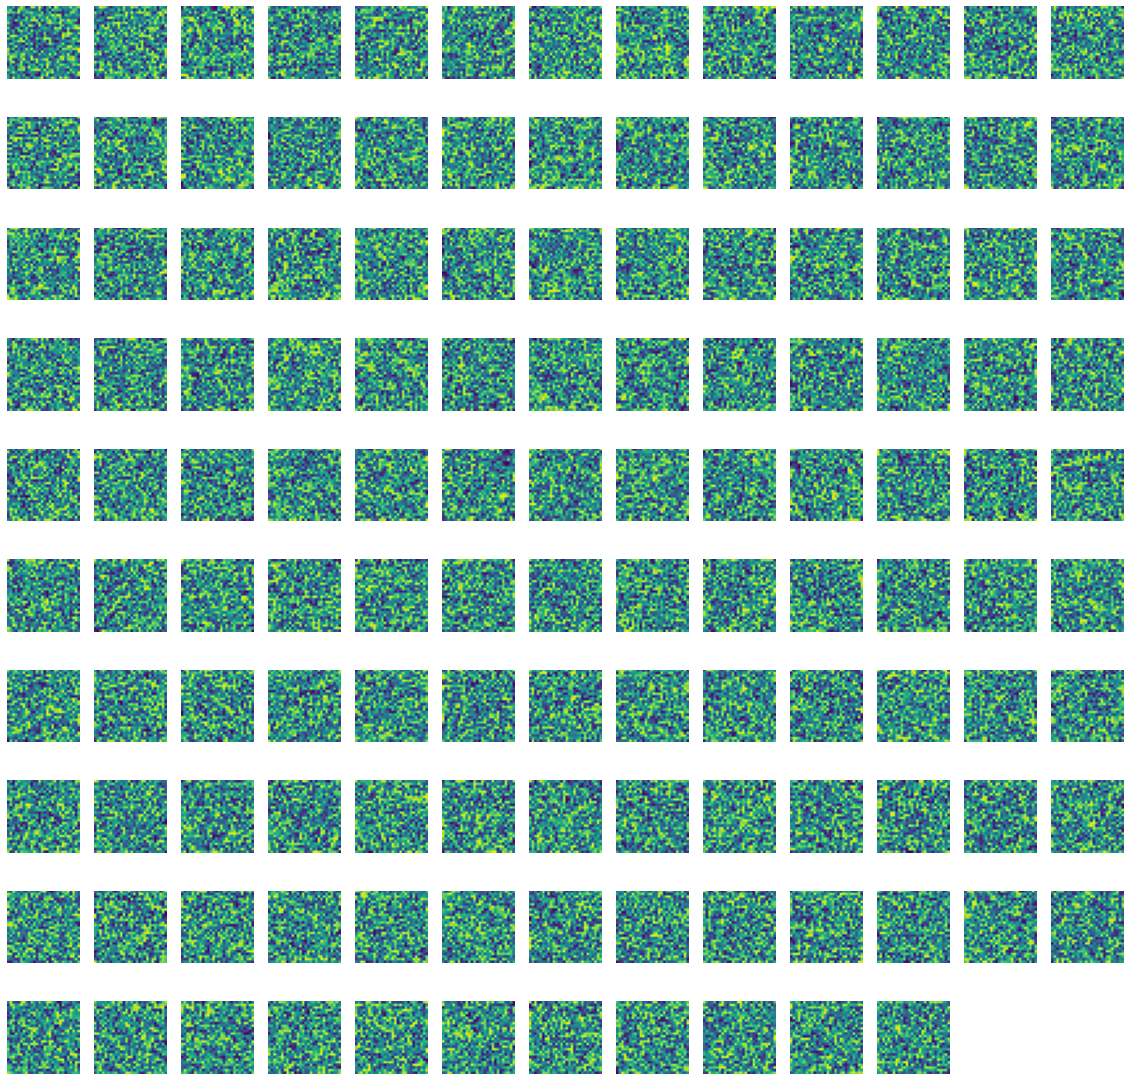

In [7]:
visualize(model)

In [8]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.6617 - accuracy: 0.8327 - val_loss: 0.3602 - val_accuracy: 0.9010
Epoch 2/10
1875/1875 [==============================] - 1s 654us/step - loss: 0.3419 - accuracy: 0.9049 - val_loss: 0.2976 - val_accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 1s 658us/step - loss: 0.2953 - accuracy: 0.9167 - val_loss: 0.2657 - val_accuracy: 0.9265
Epoch 4/10
1875/1875 [==============================] - 1s 609us/step - loss: 0.2654 - accuracy: 0.9256 - val_loss: 0.2442 - val_accuracy: 0.9314
Epoch 5/10
1875/1875 [==============================] - 1s 605us/step - loss: 0.2421 - accuracy: 0.9317 - val_loss: 0.2248 - val_accuracy: 0.9361
Epoch 6/10
1875/1875 [==============================] - 1s 612us/step - loss: 0.2228 - accuracy: 0.9373 - val_loss: 0.2083 - val_accuracy: 0.9414
Epoch 7/10
1875/1875 [==============================] - 1s 612us/step - loss: 0.2065 - accuracy: 0.9423 - val_loss: 0.1942 -

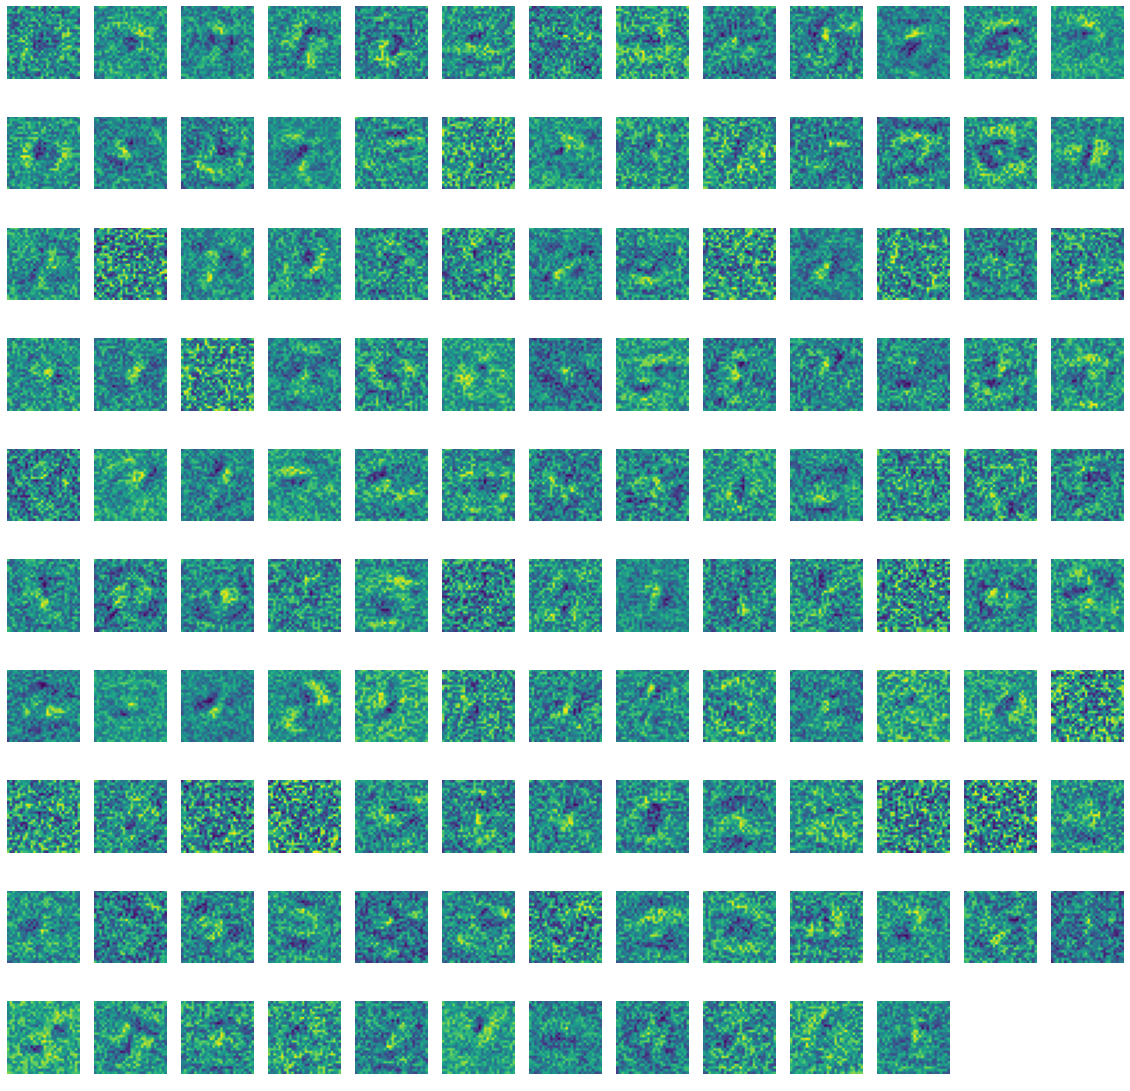

In [9]:
visualize(model)

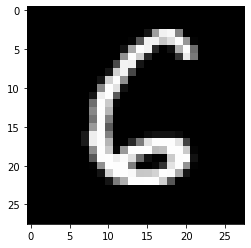

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
1/1 [==============================] - 0s 49ms/step


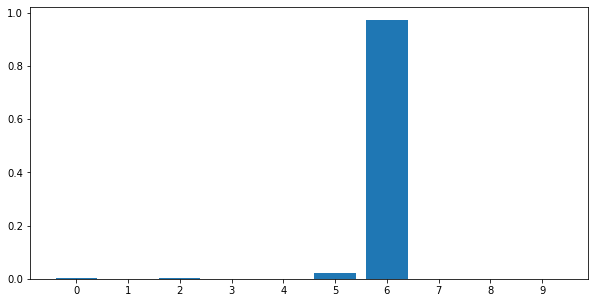

In [10]:
torecognize = 98
# draw X_test[torecognize]
plt.imshow(X_test[torecognize].reshape(28, 28), cmap='gray')
plt.show()

print(y_test[torecognize])

prediction = model.predict(X_test[torecognize].reshape(1, 28 * 28))
# bar plot
plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), prediction[0])
plt.xticks(np.arange(10))
plt.show()

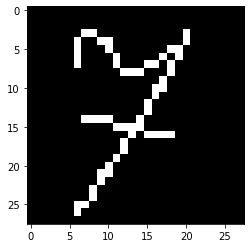

1/1 [==============================] - 0s 9ms/step


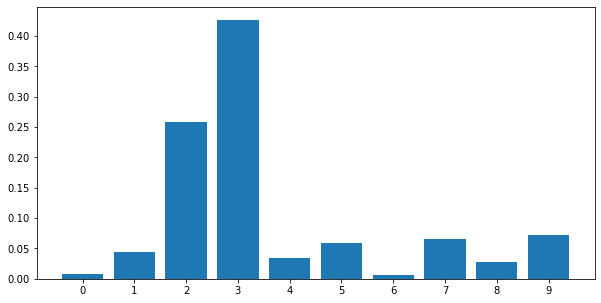

In [11]:
# import 28x28 png as 28x28 array
path = "/Users/karol/Desktop/test.png"

from PIL import Image
img = Image.open(path)
img = img.resize((28, 28))
img = img.convert('L')
img_data = np.array(img)
img_data = img_data.astype('float32') / 255
img_data

plt.imshow(img_data.reshape(28, 28), cmap='gray')
plt.show()

prediction = model.predict(img_data.reshape(1, 28 * 28))
# bar plot
plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), prediction[0])
plt.xticks(np.arange(10))
plt.show()

# EMNIST

In [12]:
# load dataset from CSV
import pandas as pd
import seaborn as sns

train = pd.read_csv('/Users/karol/Desktop/emnist-digits-train.csv', header=None)
test = pd.read_csv('/Users/karol/Desktop/emnist-digits-test.csv', header=None)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    24000
1    24000
2    24000
3    24000
4    24000
5    24000
6    24000
7    24000
8    24000
9    24000
dtype: int64

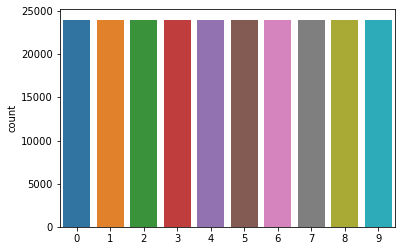

In [13]:
labels = train.reindex(columns=train.columns[:1])
data = train.reindex(columns=train.columns[1:])

test_labels = test.reindex(columns=train.columns[:1])
test = test.reindex(columns=train.columns[1:])

g = sns.countplot(labels.to_numpy().reshape(-1))

labels.value_counts()

In [14]:
data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [15]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [16]:
data = data / 255.0
test = test / 255.0

In [17]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
labels = labels.to_numpy().reshape(-1)
test_labels = test_labels.to_numpy().reshape(-1)

In [18]:
# We must transpose because the dataset is rotated
data = np.transpose(data.values.reshape(-1,28,28,1), axes=[0,2,1,3])
test = np.transpose(test.values.reshape(-1,28,28,1), axes=[0,2,1,3])

In [19]:
def create_model():
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(28*28,)))
  model.add(Dense(10, activation='softmax'))
  return model

In [20]:
from collections import defaultdict

model = create_model()
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

X_train, y_train = data.reshape(-1, 28*28), labels
y_train = to_categorical(y_train, num_classes=10)

workers = 5
epochs = 10
batch_size = 128

scores = pd.DataFrame(columns=['worker', 'epoch', 'loss', 'accuracy'])

In [21]:
models = []
gradients = []

for i in range(workers):
  models.append(clone_model(model))
  gradients.append({})

len(models)

for epoch in range(epochs):
  weights_before = models[0].get_weights()

  for worker in range(workers):
    X_train_worker, y_train_worker = X_train[worker::workers], y_train[worker::workers]

    # divide the dataset into batches
    score = {}
    old_weights = models[worker].get_weights()
    for i in range(0, len(X_train_worker), batch_size):
      X_batch = X_train_worker[i:i+batch_size]
      y_batch = y_train_worker[i:i+batch_size]
      score = model.train_on_batch(X_batch, y_batch, return_dict=True)
      print(f"epoch: {epoch}, worker: {worker}, batch: {i}, loss: {score['loss']}, accuracy: {score['accuracy']}")

    scores = pd.concat([scores, pd.DataFrame({
        'worker': [worker],
        'epoch': [epoch],
        'loss': [score['loss']],
        'accuracy': [score['accuracy']],
    })])

    new_weights = models[worker].get_weights()

    w1_diff = new_weights[0] - old_weights[0]
    b1_diff = new_weights[1] - old_weights[1]
    w2_diff = new_weights[2] - old_weights[2]
    b2_diff = new_weights[3] - old_weights[3]

    gradients[worker] = {
        'w1': w1_diff,
        'b1': b1_diff,
        'w2': w2_diff,
        'b2': b2_diff,
    }

  # average the gradients
  w1_g = np.mean([gradients[i]['w1'] for i in range(workers)], axis=0)
  b1_g = np.mean([gradients[i]['b1'] for i in range(workers)], axis=0)
  w2_g = np.mean([gradients[i]['w2'] for i in range(workers)], axis=0)
  b2_g = np.mean([gradients[i]['b2'] for i in range(workers)], axis=0)

  # update the model
  w1 = weights_before[0] + w1_g
  b1 = weights_before[1] + b1_g
  w2 = weights_before[2] + w2_g
  b2 = weights_before[3] + b2_g

  for i in range(workers):
    models[i].set_weights([w1, b1, w2, b2])


#   # a = model.train_on_batch(X_train, y_train, return_dict=True)
#   weights_after = model.get_weights()

#   scores = pd.concat([results, pd.DataFrame({
#       'worker': [worker],
#       'epoch': [epoch],
#       'loss': [a['loss']],
#       'accuracy': [a['accuracy']],
#   })])

#   epoch += 1


epoch: 0, worker: 0, batch: 0, loss: 2.4820611476898193, accuracy: 0.0625
epoch: 0, worker: 0, batch: 128, loss: 2.3712918758392334, accuracy: 0.1484375
epoch: 0, worker: 0, batch: 256, loss: 2.3926379680633545, accuracy: 0.0625
epoch: 0, worker: 0, batch: 384, loss: 2.302067279815674, accuracy: 0.1484375
epoch: 0, worker: 0, batch: 512, loss: 2.300604820251465, accuracy: 0.171875
epoch: 0, worker: 0, batch: 640, loss: 2.336611032485962, accuracy: 0.1015625
epoch: 0, worker: 0, batch: 768, loss: 2.2811338901519775, accuracy: 0.125
epoch: 0, worker: 0, batch: 896, loss: 2.2842025756835938, accuracy: 0.09375
epoch: 0, worker: 0, batch: 1024, loss: 2.2773513793945312, accuracy: 0.1328125
epoch: 0, worker: 0, batch: 1152, loss: 2.3284807205200195, accuracy: 0.140625
epoch: 0, worker: 0, batch: 1280, loss: 2.248628616333008, accuracy: 0.1484375
epoch: 0, worker: 0, batch: 1408, loss: 2.2685487270355225, accuracy: 0.140625
epoch: 0, worker: 0, batch: 1536, loss: 2.220925807952881, accuracy: 

In [22]:
# evaluate model
model.evaluate(X_test, y_test, return_dict=True)

313/313 [==============================] - 0s 585us/step - loss: 1.3462 - accuracy: 0.6633


{'loss': 1.3461787700653076, 'accuracy': 0.6632999777793884}

In [23]:
scores

worker epoch      loss  accuracy
0      0     0  0.575755     0.875
0      1     0  0.347936   0.90625
0      2     0  0.364663   0.90625
0      3     0  0.362397  0.890625
0      4     0  0.341112  0.929688
0      0     1  0.234886    0.9375
0      1     1  0.169244   0.96875
0      2     1  0.266212  0.929688
0      3     1  0.276878  0.914062
0      4     1  0.265813  0.953125
0      0     2  0.187777  0.953125
0      1     2  0.131061  0.976562
0      2     2  0.230059  0.921875
0      3     2  0.241789  0.914062
0      4     2  0.228148  0.953125
0      0     3  0.159219  0.953125
0      1     3  0.112407  0.984375
0      2     3   0.20577  0.929688
0      3     3  0.219918  0.914062
0      4     3  0.201829  0.960938
0      0     4  0.136947   0.96875
0      1     4  0.100832  0.984375
0      2     4  0.187349  0.929688
0      3     4  0.203081  0.921875
0      4     4  0.180653  0.960938
0      0     5  0.119073   0.96875
0      1     5  0.092774  0.984375
0      2     5  0.172199    0.9375
0      3     5  0.189431  0.921875
0      4     5  0.163372  0.960938
0      0     6  0.104391  0.976562
0      1     6  0.086571  0.984375
0      2     6   0.15992    0.9375
0      3     6  0.178308    0.9375
0      4     6  0.149349   0.96875
0      0     7  0.092757  0.976562
0      1     7  0.081304  0.984375
0      2     7  0.149761  0.945312
0      3     7  0.168722  0.945312
0      4     7  0.137799   0.96875
0      0     8  0.083293  0.976562
0      1     8  0.076833  0.984375
0      2     8  0.140955  0.945312
0      3     8  0.160359  0.953125
0      4     8  0.128294  0.976562
0      0     9  0.075562  0.984375
0      1     9  0.073123  0.984375
0      2     9  0.133411  0.945312
0      3     9  0.153382  0.953125
0      4     9  0.120562  0.976562

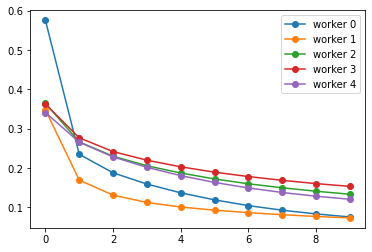

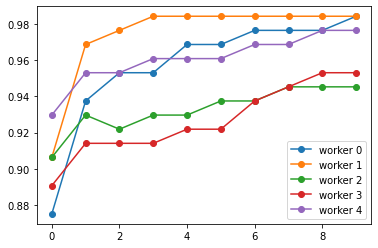

In [24]:
for i in range(workers):
  plt.plot(scores.query('worker == @i').epoch, scores.query('worker == @i').loss, 'o-', label=f'worker {i}')

plt.legend()
plt.show()

for i in range(workers):
  plt.plot(scores.query('worker == @i').epoch, scores.query('worker == @i').accuracy, 'o-', label=f'worker {i}')

plt.legend()

1 worker 10 epok: {'loss': 1.3145818710327148, 'accuracy': 0.6679999828338623}

2 workerów 10 epok: {'loss': 1.3379065990447998, 'accuracy': 0.666100025177002}

fit: [1.3528201580047607, 0.6657000184059143]
